In [ ]:
单样本检验：只关心样本的均值是否等于某个值

In [ ]:
样本均值、标准误、区间

In [ ]:
置信区间
拒绝或接受：大（大数定律）中（中心极限定律）小（小概率事件）
    中：样本量足够大，则服从正态分布
    小：小概率事件在一次事件中是不应该发生的，若发生则应该拒绝，认为其不正确
        如果认为两倍标准差之外，就拒绝
        

In [ ]:
假设检验步骤：
    1.先假设：原假设 备择假设 （只做等于，不做> < ）
    2.随意选择显著度α（根据样本量决定，样本量小，显著度要大一点）：样本量< 100个，显著度取10%
                        100 - 500，显著度取5%
                        500 - 1000，  取1%
            2000左右，取千分之一   （样本量再大，显著度就没有意义了）
          
   对假设要么拒绝，要么接受。 得到的值<5%,拒绝原假设；>5%,接受原假设
    3.采集数据
    4.得到的数据是增长率，根据增长率可以得到正态分布或其他分布
    得到均值分布，看得到的均值和假设的μ的差距有多大。任何两个变量的绝对的差是没有任何意
    义的，要看其差值是几倍的样本均值标准误
    
    
    这个值越大，d>2倍的标准误，则在拒绝域
    t统计量=差值（样本均值-原假设μ）/样本均值标准误
    t越大，差越靠边缘；可以根据t计算概率
    再拿概率和α比，若>α则接受原假设，否则拒绝原假设接受备择假设
    
    

In [1]:
# p检验
import os
os.chdir(r'E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第四章\提交-第四讲：统计建模与分析报告-二手房价格分析报告\脚本\6inference')

import pandas as pd
house_price_gr=pd.read_csv(r'house_price_gr.csv',encoding='gbk')
house_price_gr

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528
...,...,...
145,密云县沿湖小区,0.121524
146,密云县东菜园小区,0.104666
147,密云县花园小区,0.137225
148,开发区鹿鸣苑,0.073119


In [2]:
#描述性统计
house_price_gr.describe(include='all')

,dis_name,rate
count,150,150.000000
unique,150,NaN
top,朝阳区欧陆经典万兴苑南苑,NaN
freq,1,NaN
mean,NaN,0.110061
std,NaN,0.041333
min,NaN,0.029540
25%,NaN,0.080027
50%,NaN,0.104908
75%,NaN,0.140066


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

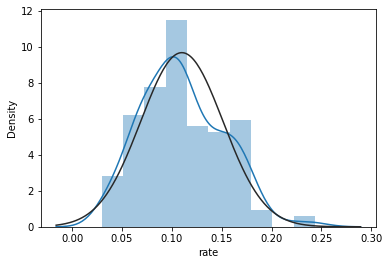

In [3]:
get_ipython().magic('matplotlib inline')
import seaborn as sns
from scipy import stats

sns.distplot(house_price_gr.rate, kde=True, fit=stats.norm) # Histograph

In [4]:
# 置信区间
se = house_price_gr.rate.std() / len(house_price_gr) ** 0.5  #计算标准误
LB = house_price_gr.rate.mean() - 1.98 * se#上届，百分之95对应的是1.98倍的标准差
UB = house_price_gr.rate.mean() + 1.98 * se#下界
(LB, UB)
#抽取了150个小区的房价增长率，得到增长率均值为11%，95%的置信区间是(0.10337882853175007, 0.11674316487209624)
# 样本均值(北京市房价同比增长率)<10.3%的概率不超过2.5%

(0.10337882853175007, 0.11674316487209624)

<ipython-input-5-a81c48e041f1>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


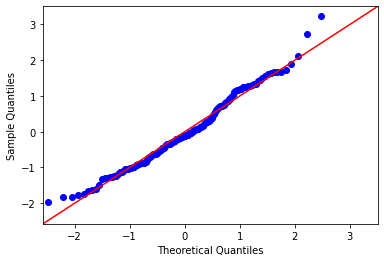

In [5]:

import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(house_price_gr.rate, fit=True, line='45')
fig.show()

In [6]:
# 或者使用DescrStatsW
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
d1.tconfint_mean(0.05) # 

(0.10339228338892811, 0.11672971001491825)

In [7]:
# 两样本t检验
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
# 根据house_price_gr.rate 数据集，得到统计量d1
print('t-statistic=%6.4f, p-value=%6.4f, df=%s' %d1.ttest_mean(0.1))
#μ=0.1，检验样本均值和假设的均值 t值=2.98 p值为0.0034 自由度df
p值越小越好，原假设永远是相等，希望是不相等，p<α,则拒绝域
样本量越大α越小
（样本量一般不超过5000）

t-statistic=2.9812, p-value=0.0034, df=149.0


In [ ]:
综上，根据数据集得到平均的北京市房屋价格的增长率是11%，根据样本得到的北京房屋价格增长率
<=10%的概率是0.0017%
若不采取措施，到年底不被问责的概率是0.0017%，99%的概率是被问责的（原假设是10%）

In [ ]:
t代表得到的均值和假设的均值的距离是多少倍的标准误，距离越远（t值越大）说明概率越小，p值越小


# 下一讲

In [ ]:
两变量关系检验方法